# Сборный проект №1

**Контекст:** Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Задачи:** Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Содержание:**
1. [Загрузка данных и изучение общей информации](#chapter1)
2. [Предобработка данных](#chapter2)
3. [Исследовательский анализ данных](#chapter3)
4. [Составим портрет пользователя каждого региона](#chapter4)
5. [Проверка гипотез](#chapter5)
6. [Общий вывод](#chapter6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

<a id="chapter1"></a>

###  Загрузка данных и изучение общей информации

In [2]:
data = pd.read_csv('/datasets/games.csv')

**1.1 Посмотрим основную информацию о датафрейме**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1.2 Посмотрим первые 5 строк**

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**1.3 Проверим явные дубликаты**

In [5]:
data.duplicated().sum()

0

**1.4 Проверка неявных дубликатов**

In [6]:
data[data.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)].sort_values('Name')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод**

- в данных имеются пропуски
- необходимо привести названия столбцов к нижнему регистру
- столбец Year_of_Release изменить тип данных на int, т.к. фактически год целое число
- столбец Critic_Score изменить тип данных на int, т.к. это целые числа
- столбец User_Score изменить тип данных на float, для исключения ошибок при арифметических операциях
- явных дубликатов нет
- есть неявные дубликаты

<a id="chapter2"></a>

###  Предобработка данных

**2.1 Приведем название колонок к нижнему регистру**

In [7]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**2.2 Обработка пропущенных значений**

2.2.1 Столбец name

In [8]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки можно удалить, т.к пропуски имеются и в других столбцах

In [9]:
data = data.dropna(subset=['name']).reset_index(drop=True)

2.2.2 Столбец year_of_release

Удалим пропуски в столбце year_of_release, они составляют менее 10%

In [10]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Остальные пропуски я не вижу смысла заполнять медианными значениями, т.к. есть большая вероятность ошибиться, поэтому заполним их некоторыми значениями 

2.2.3 Столбец critic_score

Вывожу уникальные значения столбца critic_score, для того чтобы посмотреть каким значением лучше заполнить пропуски

In [11]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Заполним пропуски значением 0

In [12]:
data['critic_score'] = data['critic_score'].fillna(0)

2.2.4 Столбец user_score

Вывожу уникальные значения столбца user_score, для того чтобы посмотреть каким значением лучше заполнить пропуски

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заполним пропуски значением -1

In [14]:
data['user_score'] = data['user_score'].fillna('-1')

Есть значение 'tbd', это значение обозначает то, что пользователи не играли в эту игру или ее еще не оценили, предлагаю также заменить на значение -1

In [15]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,0.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


In [16]:
data['user_score'] = data['user_score'].replace('tbd', '-1')

2.2.5 Столбец rating

Вывожу уникальные значения столбца rating, для того чтобы посмотреть каким значением лучше заполнить пропуски

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заполним значением unknown

In [18]:
data['rating'] = data['rating'].fillna('unknown')

**2.3 Изменим типы данных в колонках year_of_release и user_score**

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int') 
data['user_score'] = data['user_score'].astype('float') 
data['critic_score'] = data['critic_score'].astype('int') 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


**2.4 Удалим неявные дубликаты**

In [21]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release']).reset_index(drop=True)

Проверяем удаление неявных дубликатов

In [22]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**2.5 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [23]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,-1.0,unknown,31.38


**Вывод**

В данном разделе привели название колонок к нижнему регистру, также были заполнены либо удалены пропущенные значения, изменили некоторые типы данных. Удалили неявные дубликатв и добавили новый столбец с суммарными продажами во всех регионах

<a id="chapter3"></a>

###  Исследовательский анализ данных

**3.1 Посмотрим сколько игр выпускалось в разные годы**

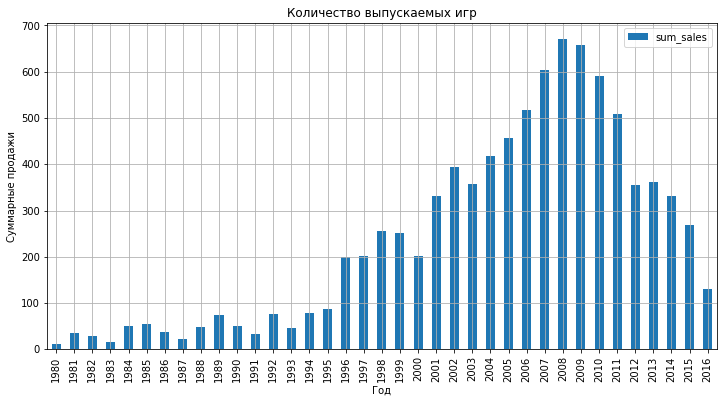

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [26]:
(data
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum') #суммарные продажи у каждой платформы
    .plot(kind='bar', grid=True, figsize=(12, 6)) #выводим столбчатую диаграмму 
)
plt.title('Количество выпускаемых игр')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()
data['year_of_release'].describe()

**Вывод:** По графику видно, что рост числа выпуска игр приходится на период с 1996 года по 2007 год. В 2007 году было выпущено максимальное количество игр, после чего начался спад. Думаю до 1996 года данные можно отбросить, т.к. до этого года было выпущенно мало компьютерных игр. Из общего количества данных это 2% 

In [27]:
data = data.query('year_of_release > 1996')

**3.2 Проанализируем продажи по платформам**

3.2.1 Найдем платформы с наибольшими суммарными продажами

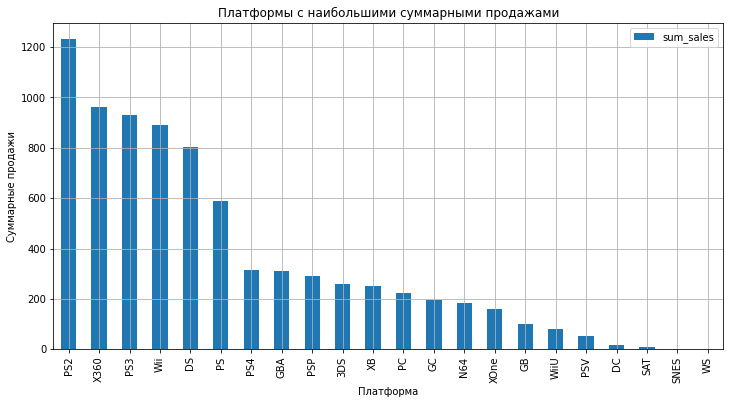

In [28]:
(data
    .pivot_table(index='platform', values='sum_sales', aggfunc='sum') #суммарные продажи у каждой платформы
    .sort_values(by='sum_sales', ascending=False) #сортируем по убыванию
    .plot(kind='bar', grid=True, figsize=(12, 6)) #выводим столбчатую диаграмму 
)
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

На графике видно, что лидируют по продажам первые шесть платформ: PS2, X360, PS3, Wii, DS, PS

3.2.2 Построим распределение по годам для данных платформ

In [29]:
top_sales = (data
             .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
             .sort_values(by='sum_sales', ascending=False)
             .reset_index() #создаем датафрейм
             .head(6)['platform'] #выводим топ первых 6 платформ
             .tolist() #создаем список для цикла построения графика
            )
top_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

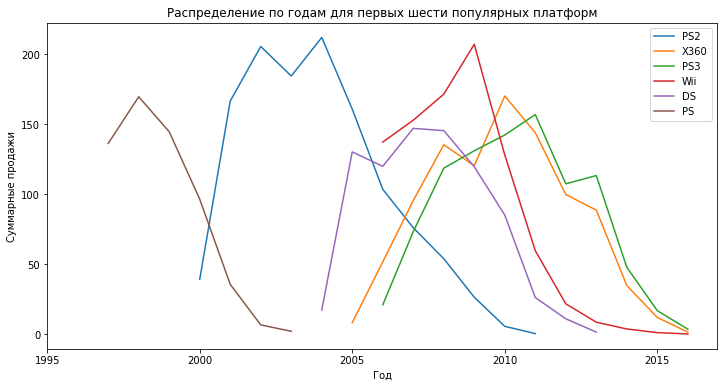

In [30]:
for name in top_sales:
    (data
        .query('platform == @name') #фильтруем
        .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum') #суммарные продажи по годам
        .sort_values('year_of_release', ascending = False)['sum_sales'] #сортируем
        .plot(figsize = (12, 6), label=name) #выводим график
    )
    plt.title('Распределение по годам для первых шести популярных платформ')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()
    plt.xticks(np.arange(1995, 2016, step=5))
plt.show()

На графике видно, что жизненый цикл популярных платформ в среднем составляет 10 лет

Создадим таблицу со сроком жизни каждой платформы

In [31]:
time_year = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']) #создаем сводную таблицу с мин и макс. значениями по годам

time_year['year'] = time_year['max'] - time_year['min'] + 1 #создаем новый столбец с "годом жизни" платформы. +1 для входа всех границ диапазона (1992-1992, будем считать за 1 год)

time_year.columns = ['min_year', 'max_year', 'year'] #переименовываем столбцы

time_year.sort_values('year', ascending = False) #выводим сортированый список 

,min_year,max_year,year
platform,,,
PC,1997,2016,20
X360,2005,2016,12
PS2,2000,2011,12
PSP,2004,2015,12
Wii,2006,2016,11
PS3,2006,2016,11
DC,1998,2008,11
DS,2004,2013,10
XB,2000,2008,9


In [32]:
time_year['year'].median() # срок исчезновения старых и появления новых платформ

7.0

In [33]:
# код ревьюера
data.groupby('platform')['year_of_release'].nunique().median()

7.0

**Вывод:**
Платформы с наибольшими суммарными продажами: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS' имеющие срок жизни 10 лет, но у платформ 'X360', 'PS3', 'Wii' срок жизни еще не закончен. На основании всех данных платформ нашли средний срок жизни платформ, он составил 7 лет

**3.3 Определим данные за соответствующий актуальный период**

Средний срок жизни популярных платформ составляет 10 лет, предлагаю взять данные за последние 3 года, так как в этом промежутке можно посмотреть пик продаж и середину жизненого цикла платформ 

In [34]:
data = data.query('year_of_release >= 2014').reset_index(drop=True) #отфильтруем данные 

**3.4 Выберем несколько потенциально прибыльных платформ**

In [35]:
top_sales = (data
             .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
             .sort_values(by='sum_sales', ascending=False)
             .reset_index() #создаем датафрейм
             .head(6)['platform'] #выводим топ первых 6 платформ
             .tolist() #создаем список для цикла построения графика
            )
top_sales

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']

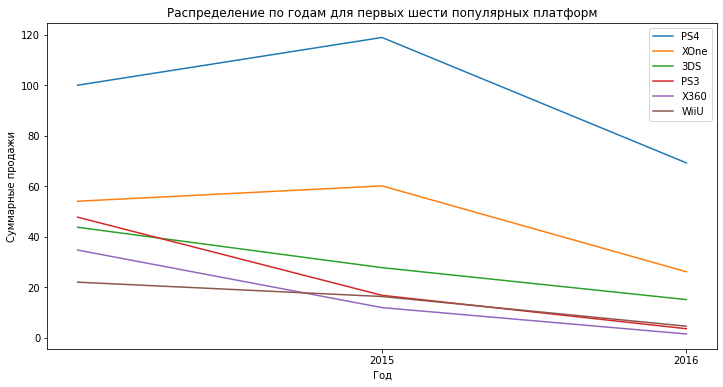

In [36]:
for name in top_sales:
    (data
        .query('platform == @name') #фильтруем
        .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum') #суммарные продажи по годам
        .sort_values('year_of_release', ascending = False)['sum_sales'] #сортируем
        .plot(figsize = (12, 6), label=name) #выводим график
    )
    plt.title('Распределение по годам для первых шести популярных платформ')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()
    plt.xticks(np.arange(2015, 2017, step=1))
plt.show()

**Вывод**
По графикам видно, что продажи падают почти по всем платформам. Но можно выделить лидеров это PS4 и XOne

**3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

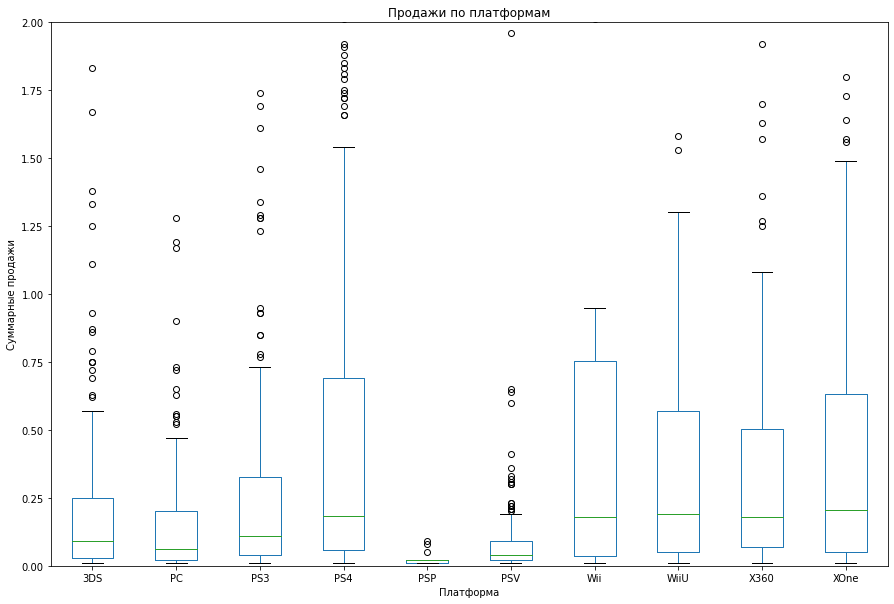

In [37]:
(data
    .pivot_table(index = 'name', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .plot(kind = 'box', figsize=(15, 10))
)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.ylim(0, 2)
plt.show()

In [38]:
data['sum_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: sum_sales, dtype: float64

**Вывод**
По всей выборке медианное значение составляет 0,12, но у большинства платформ оно не совпадает. У платформ 3DC, PC, PSP, PSV достаточно много выбросов. Скорее всего это были какие-то популярные игры, которые вошли в топ. 
По графикам также видно лидеров это PS4, XOne

**3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Возьмем платформу PS4

3.6.1 Построим диаграмму рассеяния продаж от оценки критиков

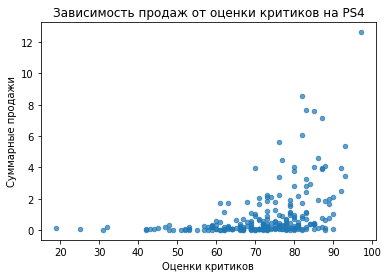

Коэффициент корреляции между оценками критиков и продажами платформы PS4: 0.40266141068104083


In [39]:
(data
    .query('(platform == "PS4") & (critic_score > 0)')
    .plot(x='critic_score', y ='sum_sales', kind ='scatter', alpha = 0.7))

plt.title('Зависимость продаж от оценки критиков на PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции между оценками критиков и продажами платформы PS4:', data.query('(platform == "PS4") & (critic_score > 0)')['critic_score'].corr(data.query('(platform == "PS4") & (critic_score > 0)')['sum_sales']))

3.6.2 Построим диаграмму рассеяния продаж от оценки пользователей

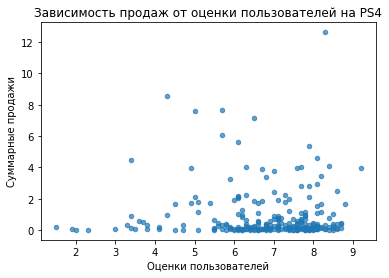

Коэффициент корреляции между оценками пользователями и продажами платформы PS4: -0.040131589472697356


In [40]:
(data
    .query('(platform == "PS4") & (user_score > -1)')
    .plot(x='user_score', y ='sum_sales', kind ='scatter', alpha = 0.7))

plt.title('Зависимость продаж от оценки пользователей на PS4')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции между оценками пользователями и продажами платформы PS4:', data.query('(platform == "PS4") & (user_score > -1)')['user_score'].corr(data.query('(platform == "PS4") & (user_score > -1)')['sum_sales']))

**Вывод**
По графикам можно сделать вывод, что есть малая зависимость, чем выше оценки, тем выше продажи, хотя по коэффициентам корреляции этого не скажешь

**3.7 Посмотрим, как влияют на продажи платформ XOne и 3DS отзывы пользователей и критиков**

3.7.1 Построим диаграмму рассеяния продаж от оценки критиков платформы XOne

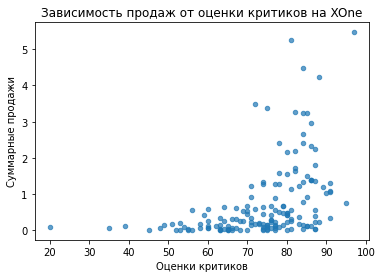

Коэффициент корреляции между оценками критиков и продажами платформы XOne: 0.42867694370333226


In [41]:
(data
    .query('(platform == "XOne") & (critic_score > 0)')
    .plot(x='critic_score', y ='sum_sales', kind ='scatter', alpha = 0.7))

plt.title('Зависимость продаж от оценки критиков на XOne')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции между оценками критиков и продажами платформы XOne:', data.query('(platform == "XOne") & (critic_score > 0)')['critic_score'].corr(data.query('(platform == "XOne") & (critic_score > 0)')['sum_sales']))

3.7.2 Построим диаграмму рассеяния продаж от оценки пользователей платформы XOne

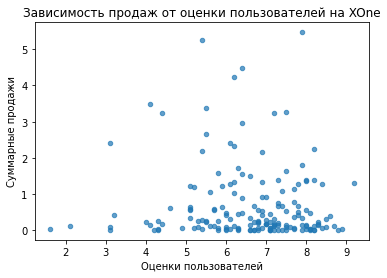

Коэффициент корреляции между оценками пользователями и продажами платформы XOne: -0.0703839280647581


In [42]:
(data
    .query('(platform == "XOne") & (user_score > -1)')
    .plot(x='user_score', y ='sum_sales', kind ='scatter', alpha = 0.7))

plt.title('Зависимость продаж от оценки пользователей на XOne')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции между оценками пользователями и продажами платформы XOne:', data.query('(platform == "XOne") & (user_score > -1)')['user_score'].corr(data.query('(platform == "XOne") & (user_score > -1)')['sum_sales']))

3.7.3 Построим диаграмму рассеяния продаж от оценки критиков платформы 3DS

Это менее популярная платформа, рассмотрим ее поподробнее

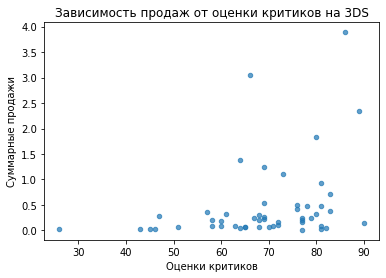

Коэффициент корреляции между оценками критиков и продажами платформы 3DS: 0.314117492869051


In [43]:
(data
    .query('(platform == "3DS") & (critic_score > 0)')
    .plot(x='critic_score', y ='sum_sales', kind ='scatter', alpha = 0.7))

plt.title('Зависимость продаж от оценки критиков на 3DS')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции между оценками критиков и продажами платформы 3DS:', data.query('(platform == "3DS") & (critic_score > 0)')['critic_score'].corr(data.query('(platform == "3DS") & (critic_score > 0)')['sum_sales']))

3.7.4 Построим диаграмму рассеяния продаж от оценки пользователей платформы 3DS

Это менее популярная платформа, рассмотрим ее поподробнее

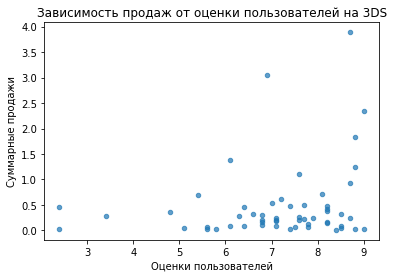

Коэффициент корреляции между оценками пользователями и продажами платформы 3DS: 0.2151932718527028


In [44]:
(data
    .query('(platform == "3DS") & (user_score > -1)')
    .plot(x='user_score', y ='sum_sales', kind ='scatter', alpha = 0.7))

plt.title('Зависимость продаж от оценки пользователей на 3DS')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции между оценками пользователями и продажами платформы 3DS:', data.query('(platform == "3DS") & (user_score > -1)')['user_score'].corr(data.query('(platform == "3DS") & (user_score > -1)')['sum_sales']))

**Вывод** 
В принципе, по всем графикам есть малая засимость оценок от продаж, взяв популярные платформы PS4, XOne и менее популярную 3DS, но влияние оценки критиков на продажи влияет больше 

**3.8 Посмотрим на общее распределение игр по жанрам**

3.8.1 Найдем самый прибыльный жанр игр

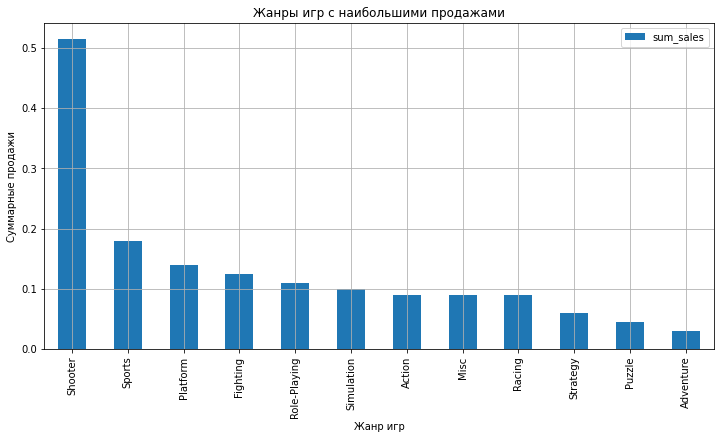

In [45]:
(data
    .pivot_table(index='genre', values='sum_sales', aggfunc='median') #медианные продажи по жанрам
    .sort_values(by='sum_sales', ascending=False) #сортируем по убыванию
    .plot(kind='bar', grid=True, figsize=(12, 6)) #выводим столбчатую диаграмму 
)
plt.title('Жанры игр с наибольшими продажами')
plt.xlabel('Жанр игр')
plt.ylabel('Суммарные продажи')
plt.show()

**Вывод**
Самые прибыльные жанры игр: Shooter, Sports, Platform
Самый популярный жанр Shooter, у него больше всего продаж, а меньше всего у Adventure, этот жанр менее популярен

<a id="chapter4"></a>

###  Составим портрет пользователя каждого региона

**4.1 Топ-5 самых популярных платформ в регионе**

In [46]:
na = (data
        .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'platform'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]

eu = (data
        .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'platform'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]

jp = (data
        .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'platform'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]


ps = pd.merge(na, eu, left_index=True, right_index=True)
ps = pd.merge(ps, jp, left_index=True, right_index=True)
ps.rename(columns = {'platform_x':'na_platform', 'platform_y':'eu_platform', 'platform':'jp_platform'}, inplace = True )

ps

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,PS4,98.61,PS4,130.04,3DS,44.24
1,XOne,81.27,XOne,46.25,PS4,15.02
2,X360,28.30,PS3,25.54,PSV,14.54
3,3DS,22.64,PC,17.97,PS3,11.22
4,PS3,22.05,3DS,16.12,WiiU,7.31
5,Other,31.19,Other,34.76,Other,0.76


In [47]:
data_regions = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'platform': ['na_platform', 'eu_platform', 'jp_platform'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data_regions) 
regions

,region,platform,sales
0,NA - Америка,na_platform,na_sales
1,EU - Европа,eu_platform,eu_sales
2,JP - Япония,jp_platform,jp_sales


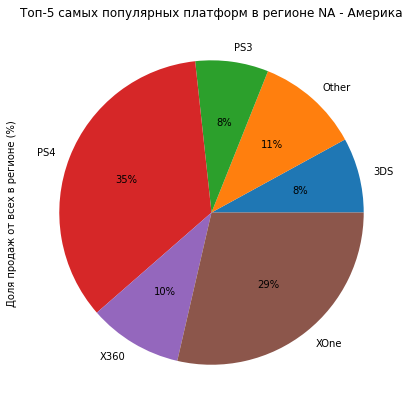

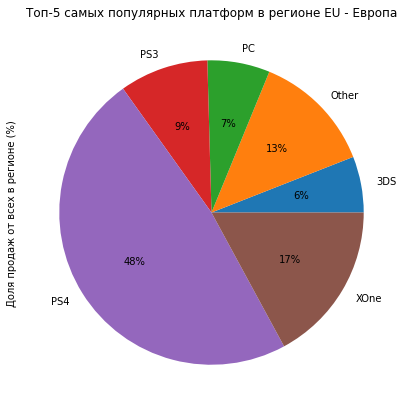

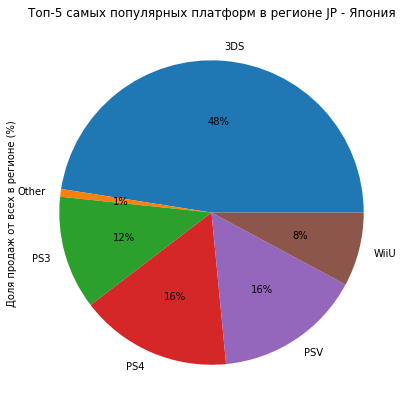

In [48]:
for i in regions.index :
    name = regions['region'][i]
    (ps.pivot_table(index=regions['platform'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    plt.title(f'Топ-5 самых популярных платформ в регионе {name}')
    plt.show()

**4.2 Топ-5 самых популярных жанров в регионе**

In [49]:
na = (data
        .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'genre'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]

eu = (data
        .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'genre'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]

jp = (data
        .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'genre'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]

gs = pd.merge(na, eu, left_index=True, right_index=True)
gs = pd.merge(gs, jp, left_index=True, right_index=True)
gs.rename(columns = {'genre_x':'na_genre', 'genre_y':'eu_genre', 'genre':'jp_genre'}, inplace = True )

gs

,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,Shooter,79.02,Action,74.68,Role-Playing,31.16
1,Action,72.53,Shooter,65.52,Action,29.58
2,Sports,46.13,Sports,45.73,Fighting,6.37
3,Role-Playing,33.47,Role-Playing,28.17,Misc,5.61
4,Misc,15.05,Racing,14.13,Shooter,4.87
5,Other,37.86,Other,42.45,Other,15.50


In [50]:
data_region = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data_region)

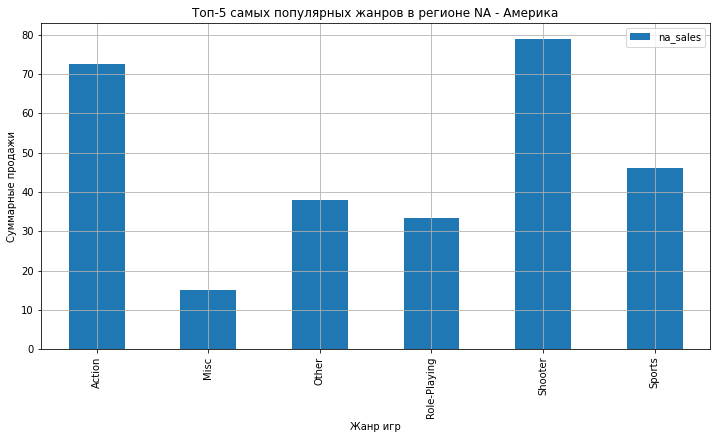

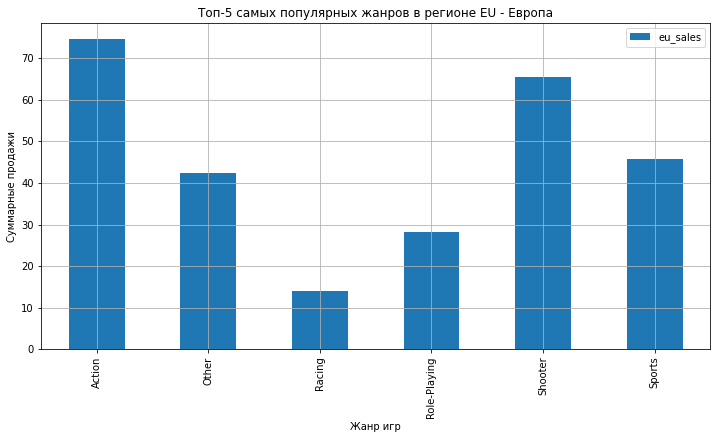

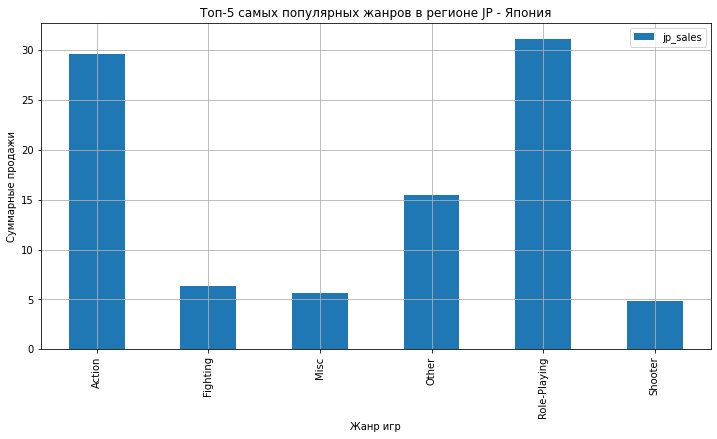

In [51]:
for i in regions.index :
    name = regions['region'][i]
    (gs.pivot_table(index=regions['genre'][i], values=regions['sales'][i], aggfunc='sum')
     #.sort_values(by='sales', ascending=False)
     .plot(kind='bar', grid=True, figsize=(12, 6))
    )
    
    
    plt.title(f'Топ-5 самых популярных жанров в регионе {name}')
    plt.xlabel('Жанр игр')
    plt.ylabel('Суммарные продажи')
    plt.show()

**4.3 Доля продаж в зависимости от рейтинга ESRB в регионе**

In [52]:
na = (data
        .pivot_table(index=['rating'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )

eu = (data
        .pivot_table(index=['rating'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )

jp = (data
        .pivot_table(index=['rating'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )

gs = pd.merge(na, eu, left_index=True, right_index=True)
gs = pd.merge(gs, jp, left_index=True, right_index=True)
gs.rename(columns = {'rating_x':'na_rating', 'rating_y':'eu_rating', 'rating':'jp_rating'}, inplace = True )

gs

,na_rating,na_sales,eu_rating,eu_sales,jp_rating,jp_sales
0,M,96.42,M,93.44,unknown,56.90
1,unknown,64.72,unknown,58.95,T,14.78
2,E,50.74,E,58.06,E,8.94
3,T,38.95,T,34.07,M,8.01
4,E10+,33.23,E10+,26.16,E10+,4.46


In [53]:
data_region = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'rating': ['na_rating', 'eu_rating', 'jp_rating'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data_region)

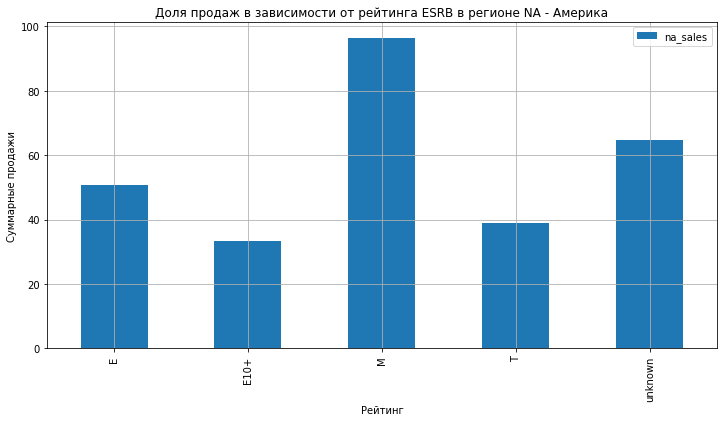

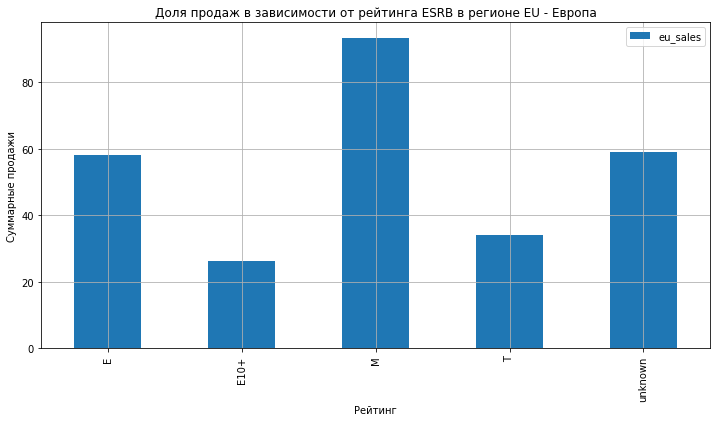

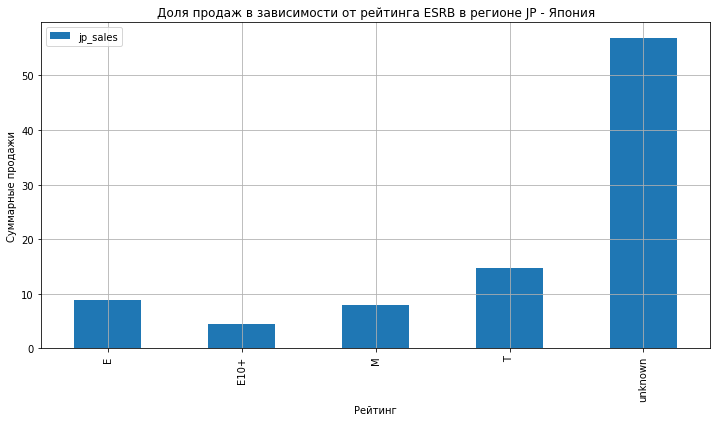

In [54]:
for i in regions.index :
    name = regions['region'][i]
    (gs.pivot_table(index=regions['rating'][i], values=regions['sales'][i], aggfunc='sum')
     #.sort_values(by='sales', ascending=False)
     .plot(kind='bar', grid=True, figsize=(12, 6))
    )
    
    
    plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе {name}')
    plt.xlabel('Рейтинг')
    plt.ylabel('Суммарные продажи')
    plt.show()

**Вывод:**

* Пользователи региона NA в 35% выбираю платформу PS4, предпочитают жанр игр "Shooter" с рейтингом "М"
* Пользователи региона EU в 48% выбираю платформу PS4, предпочитают жанр игр "Shooter" с рейтингом "М"
* Пользователи региона JP в 48% выбираю платформу 3DS, предпочитают жанр игр "Role-Playing" без рейтинга

<a id="chapter5"></a>

###  Проверка гипотез

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [55]:
xone = data.query('platform == "XOne" and user_score > -1')
pc = data.query("platform == 'PC' and user_score > -1")

alpha = 0.05

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'],
    equal_var=False, #дисперсии генеральных совокупносстей не равны
    alternative='two-sided') #проверка двухсторонней гипотезы

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.11601398086668832
Не отвергаем нулевую гипотезу


Мы не можем сказать (а тем более утвреждать), что средние пользовательские рейтинги платформ Xbox One и PC равны (можно убедиться, что они разные). Мы лишь говорим ,что не можем отвергнуть нулевую гипотезу и что с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий. 

**5.2 Средние пользовательские рейтинги жанров Action и Sports разные**

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны

In [56]:
action = data.query('genre == "Action" and user_score > -1')
sports = data.query('genre == "Sports" and user_score > -1')

alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var=False, #дисперсии генеральных совокупносстей не равны
    alternative='two-sided') #проверка двухсторонней гипотезы

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута и есть основания предположить, что рейтинги жанров Action и Sports не равны, а значит разные, при установленном уровне значимости в 5 %

**Как вы сформулировали нулевую и альтернативную гипотезы**

Нулевая гипотеза чаще всего формулируется в виде "параметр ГС равен некоторому числу"

Альтернативная гипотеза формулируется обычно "не равен, больше числа, меньше числа". Если исспользуем формулировку не равен то это двусторонняя гипотеза.

**Какой критерий применили для проверки гипотез и почему**

У нас две независимые выборки, равенство средних генеральных совокупностей, поэтому используем ttest_ind()

<a id="chapter6"></a>

###  Общий вывод

**В данном проекте были выполнены следующие работы**

*Изучена общая информация о данных*

*Предобработка данных:*

- привели название колонок к нижнему регистру
- были заполнены либо удалены пропущенные значения
- изменили некоторые типы данных
- удалили неявные дубликаты
- добавили новый столбец с суммарными продажами во всех регионах

*Исследовательский анализ данных:*

- определили период роста числа выпуска игр с 1996 года по 2007 год, а в 2007 году было выпущено максимальное количество игр, после чего начался спад
- найдены платформы с наибольшими суммарными продажами: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS' имеющие срок жизни 10 лет. На основании всех данных платформ нашли средний срок жизни платформ, он составил 7 лет
-  отфильтровали датафрейм, взяв данные за последние 3 года, так как в этом промежутке можно посмотреть пик продаж и середину жизненого цикла платформ
- выделили лидеров платформ: PS4 и XOne
- построили "Ящик с усами" и по нему определили медианное значение по всей выборке, оно составило 0,12, но у большинства платформ оно не совпадает. У платформ 3DC, PC, PSP, PSV достаточно много выбросов. По графикам также видно лидеров это PS4, XOne
- нашли малую зависимость между продажами и отзывами пользователей/критиков 
- определили самые прибыльные жанры игр: Shooter, Sports, Platform. Самый популярный жанр Shooter, у него больше всего продаж, а меньше всего у Adventure, этот жанр менее популярен

*Составили портреты пользователей из регионов:*

- Пользователи региона NA в 35% выбираю платформу PS4, предпочитают жанр игр "Shooter" с рейтингом "М"
- Пользователи региона EU в 48% выбираю платформу PS4, предпочитают жанр игр "Shooter" с рейтингом "М"
- Пользователи региона JP в 48% выбираю платформу 3DS, предпочитают жанр игр "Role-Playing" без рейтинга

*Проверили гипотезы*
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые (Не удалось отвергнуть нулевую гипотезу)
- средние пользовательские рейтинги жанров Action и Sports разные (Отвергли нулевую гипотезу)

*Рекомендации*

Проведение рекламных кампаний на лидирующие продукты: платформа PS4, жанры Shooter и Sports с рейтингом "M" (для взрослых)
